In [1]:
# Import the numpy and pandas package
import numpy as np
import pandas as pd
import scipy.stats as stats
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# For matrix multiplication, we are always interested in our X matrix
# X = [ coloumn of 1s excel file for feaatures]
# The @ is amtrix multiplication sign 
# X.T @ x (This line of code means x-transpose * x)
# Computing the inverse is the most computational part of any optimization problem 
# The most commonly used algorithms to calculate the inverse are called the inverse or pseudo-inverse

# The beta matrix that represents the solution to the multiple linear regression is defined as: 
# beta = np.linalg.inv(X.T @X) @ X.T @ y

# Sometimes the matrix is not invertable, because you have two identical rows. In such case, we should do the pseudo-inverse
# beta = np.linalg.pinv(X.T @X) @ X.T @ y
# The pseudo-inverse doies a trick inside the matrix to make suer that numerical instabilities do NOT exist
# In the case of pseudo-inverse, you do not get an inverse you get an approximate inverse, hence your beta values will be sligtly different

# What if I want to do "Ridge Regression", in such case you add the value of lampda or alpha
# beta = np.linalg.inv(X.T @X + alpha*np.eye(p)) @ X.T @ y
# We introduced the multiplication with the identity matrix, because without the multiplication there would be a problem since we are adding constant to a matrix
# The size of the identity matrix should be the same as X 

# There is no straight way in Python to do the forward, the backward and the stepwise model selection techniques

In [3]:
# Defining the design matrix (column of 1s followed by the readings of the features)

X = np.asmatrix([
    [1,   0 ,    0 ,0],
    [1, -20 ,   16 ,0],
    [1,  20 ,   16 ,0],
    [1, -20 ,  -16 ,0],
    [1,  20 ,  -16 ,0],
    
    [1,   0 ,    0 ,13],
    [1, -20 ,   16 ,13],
    [1,  20 ,   16 ,13],
    [1, -20 ,  -16 ,13],
    [1,  20 ,  -16 ,13],
    
    [1,   0 ,    0 ,28],
    [1, -20 ,   16 ,28],
    [1,  20 ,   16 ,28],
    [1, -20 ,  -16 ,28],
    [1,  20 ,  -16 ,28],
    
    [1,   0 ,    0 ,42],
    [1, -20 ,   16 ,42],
    [1,  20 ,   16 ,42],
    [1, -20 ,  -16 ,42],
    [1,  20 ,  -16 ,42],
    
    
    [1,   0 ,    0 ,60],
    [1, -20 ,   16 ,60],
    [1,  20 ,   16 ,60],
    [1, -20 ,  -16 ,60],
    [1,  20 ,  -16 ,60],
])

# Yield (%) values
y = np.asmatrix([
                  [77], [76], [76], [76], [76], 
                 [104], [80], [85], [95], [95],
                 [119], [85], [93], [102], [102],
                 [140], [94], [104], [125], [125],
                 [167], [105],[141], [153], [153]
])

print(X.shape)  # The shape of the X matrix is (25,4), which means it has 8 rows and 3 columns 
print(y.shape)  # The shape of the y matrix is (25,1), meaning that it has 8 rows and 1 column

(25, 4)
(25, 1)


In [4]:
# The expected values of Betas
# Calculating the coefficients of the multiple linear regression 
# y is a matrix, that has one column
np.asmatrix(y).shape # the shape of the matrix is (25,1)

# -------------------------------

beta = np.linalg.inv(X.T @ X) @ X.T @ y
beta
# The results of this line of code are the exact same as obtained using the sm.OLS
# -------------------------------

# # In case we want to do "Ridge Regression"
# # We add a penalty (number * identity matrix that is of the same size as the x matrix) 
# # Why 4? because I have 4 betas
# beta = np.linalg.inv(X.T @ X + 0.1 * np.eye(4)) @ X.T @ y
# beta
# # The number of betas will change significantly when using the constant as 0.1. The larger the number that you are using the closer to zeros values of betas you are getting
# # You want to make sure to use smaller value for the consatnt like 0.001
# # In our case, I mean when using the consatnt as 0.1, the first beta to respond will be the largest (beta-0)

# # -------------------------------
# # Although, we are using "Ridge Regression", I do not want to minimize beta-0
# # In case I want to minimze all other betas but not beta-0 (The key is with the identity matrix, that we are multipying with)
# # |0 0 0|
# # |0 1 0|  * 0.1 
# # |0 0 1|  # Notice, that this is not the identity matrix

# A = np.asmatrix([[0, 0, 0], [0, 1, 0], [0, 0, 1]])
# A
# beta = np.linalg.inv(X.T @ X + 0.1 * A) @ X.T @ y
# beta

# # If we do 2000* A, it will only give me the b-0, which will be the average of y-train  
# # Every time we increase the consatnt number that we are multiplying with, we are increasing the errors
beta.shape

(4, 1)

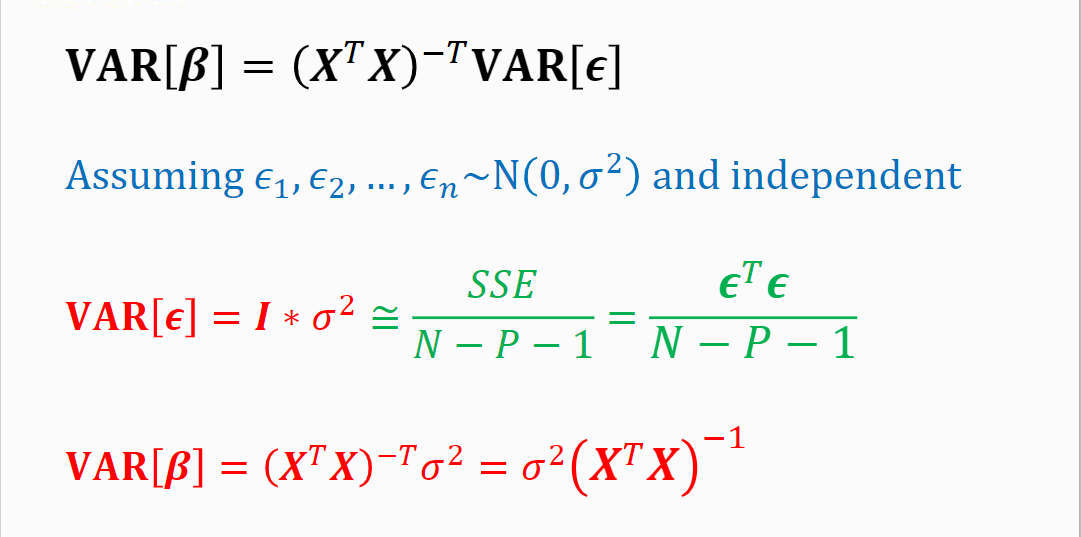

In [6]:
# Calcualting the predicted values of y
y_predicted =  X @ beta   # The shape of X is (25,4). The shape of teh beta matrix is (4,1)
print(y_predicted)   # The result is a matrix of size (25,1), which represent y-value for each of the 25 points we have!
print("\n")
print(y_predicted.shape)

[[ 74.84883261]
 [ 63.74883261]
 [ 69.64883261]
 [ 80.04883261]
 [ 85.94883261]
 [ 88.97209052]
 [ 77.87209052]
 [ 83.77209052]
 [ 94.17209052]
 [100.07209052]
 [105.26815733]
 [ 94.16815733]
 [100.06815733]
 [110.46815733]
 [116.36815733]
 [120.47781968]
 [109.37781968]
 [115.27781968]
 [125.67781968]
 [131.57781968]
 [140.03309986]
 [128.93309986]
 [134.83309986]
 [145.23309986]
 [151.13309986]]


(25, 1)


In [10]:
# defining N & P in order to calculate the variance of the residuals
N = X.shape[0]      # N: The total number of observations that we have, which is the number of rows in the matrix X
P = X.shape[1] - 1  # P: The total number of features that we have, that is the number of columns in the design matrix - 1

# N = 25 
# P = 3 (x, y coordinates & Time)

# Calculating the "Residuals": True y_values - Predicted y_values
residuals = y - y_predicted 
# residuals
# residuals.shape    # A matrix of size (8,1). That says the residuals is a column matrix

# Calculating the varience of the residuals (MSE)
var_residuals = (residuals.T @ residuals) / (N - P - 1)
var_residuals
# The variance of the residuals is a matrix of size (1,1)
# VARIENCE OF RESIDUALS IS THE SAME AS MSE

# The "Residuals Standard Error" is the square root of the "Residuals Varience"

Residuals_Standard_Error = np.sqrt(var_residuals)
print(Residuals_Standard_Error)

[[12.64873725]]


Text(0.5, 1.0, 'Q-Q Plot')

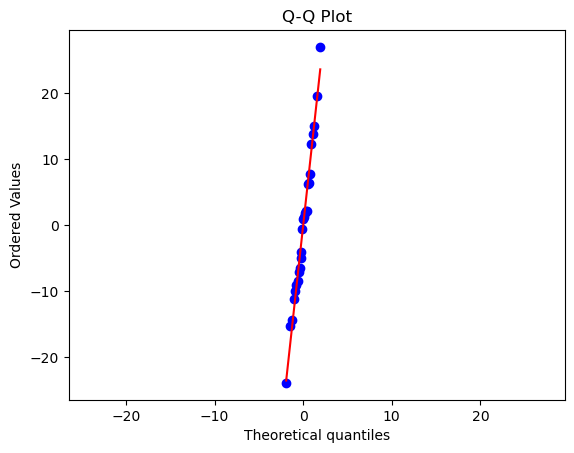

In [11]:
# Histogram
plt.hist(residuals, bins=15, density=True, alpha=0.6, color='b')
plt.title('Residuals Histogram')
plt.xlabel('Residuals')
plt.ylabel('Frequency')

# Q-Q Plot
stats.probplot(np.array(residuals.T)[0], dist="norm", plot=plt)
plt.title('Q-Q Plot')

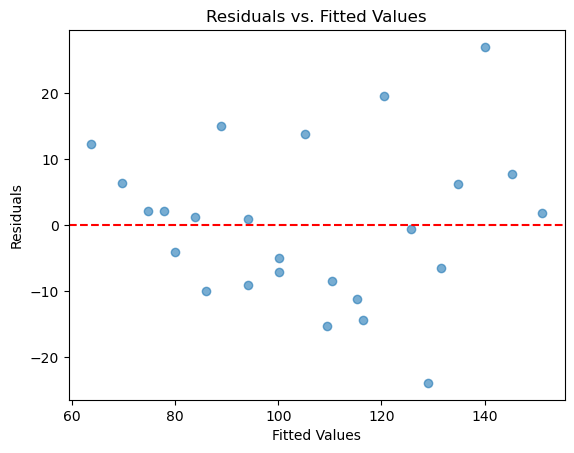

In [18]:
import matplotlib.pyplot as plt

# Assuming y_predicted and residuals are your 2D matrices
y_predicted = y_predicted.A.flatten()  # Convert to 1D array
residuals = residuals.A.flatten()  # Convert to 1D array

# Scatter plot of residuals vs. fitted values
plt.scatter(y_predicted, residuals, alpha=0.6)
plt.title('Residuals vs. Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.axhline(y=0, color='r', linestyle='--')  # Add a horizontal line at y=0 for reference
plt.show()


In [19]:
# Calculating the varience of betas
# -------------------------------
# The final result for this part "np.linalg.inv(X.T @ X)" is a matrix of size (4,4)

# var_residuals[0,0] is used to access the specific number in the matrix
# var_residuals[0,0] * np.eye(4) is used to get a matrix of size 4 * 4 to confirm the consistency of sizes for matrices multiplication

var_beta = (var_residuals[0,0] * np.eye(4)) @ np.linalg.inv(X.T @ X)
print(var_beta)

# NOTE: e+01 means (1*10)^1
print("\n")
# -------------------------------
# Accessing the diagonal elements that represent the values of b_0, b_1, b_2 and b_3 respectively
diagonal_elements = np.diag(var_beta)
print("var (b_0) = {}".format(diagonal_elements[0]))

print("var (b_1) = {}".format(diagonal_elements[1]))

print("var (b_2) = {}".format(diagonal_elements[2]))

print("var (b_3) = {}".format(diagonal_elements[3]))

print("\n")
# -------------------------------
# Calcualting the "Standard Error" for each of the betas
print("Std.Error (b_0) = {}".format(np.sqrt(diagonal_elements[0])))

print("Std.Error (b_1) = {}".format(np.sqrt(diagonal_elements[1])))

print("Std.Error (b_2) = {}".format(np.sqrt(diagonal_elements[2])))

print("Std.Error (b_3) = {}".format(np.sqrt(diagonal_elements[3])))


[[ 1.81512272e+01  0.00000000e+00  0.00000000e+00 -4.10895281e-01]
 [ 0.00000000e+00  1.99988193e-02  0.00000000e+00  0.00000000e+00]
 [ 0.00000000e+00  0.00000000e+00  3.12481551e-02  0.00000000e+00]
 [-4.10895281e-01  0.00000000e+00  0.00000000e+00  1.43669679e-02]]


var (b_0) = 18.151227186063185
var (b_1) = 0.019998819252018338
var (b_2) = 0.03124815508127865
var (b_3) = 0.014366967853461442


Std.Error (b_0) = 4.260425704793264
Std.Error (b_1) = 0.14141718160117014
Std.Error (b_2) = 0.17677147700146267
Std.Error (b_3) = 0.11986228703583726


In [20]:
# Calculating the t-values for the betas
# The "t-value" for any beta can be computed as: (expected value of beta_j / standard error of beta_j)
# Preparing the diagonal elements matrix to be of similar size as the beta matrix, that is (4,1) & Taking the squaer root of the numbers to get the std.Error
std_error_beta = np.asmatrix(np.sqrt(diagonal_elements)).T

t_values_beta = np.divide(beta ,std_error_beta)
t_values_beta

matrix([[17.56839288],
        [ 1.04301329],
        [-2.88154519],
        [ 9.06377211]])

In [21]:
# Calcualting the P-value for the betas
# Degrees of freedom (df) based on the number of samples and parameters in your model
df = N - P - 1 

# Calculate the p-values
p_values = 2 * (1 - stats.t.cdf(np.abs(t_values_beta), df))
print(p_values)
# -------------------------------
# Define the confidence level (1 - alpha)
alpha = 0.05  # For a 95% confidence level, alpha is 0.05

# Calculate the critical value from the t-distribution
critical_value = stats.t.ppf(1 - alpha / 2, df)  # For a two-tailed test

# Calculate the margin of error
margin_of_error = critical_value * std_error_beta

# Calculate the lower and upper bounds of the confidence intervals
ci_lower = beta - margin_of_error
ci_upper = beta + margin_of_error


[[4.92939023e-14]
 [3.08801217e-01]
 [8.92993865e-03]
 [1.05237368e-08]]


In [10]:
# Printing the "Summary Table" of coefficients

# Combine matrices into a DataFrame
summary_beta = np.concatenate((beta,
                               std_error_beta, 
                               t_values_beta, 
                               p_values,
                               ci_lower,
                               ci_upper), axis=1)

# Create a DataFrame from the summary_beta
coef_summary_df = pd.DataFrame(summary_beta, 
                               columns=['Estimate', 'Std.Error', 't-value', 'Pr(> |t|)', f'{int((1-alpha)*100)}% CI Lower',f'{int((1-alpha)*100)}% CI Upper'])

# Renaming the indicies 
coef_summary_df  = coef_summary_df .rename(index={i: f'beta-{i}' for i in range(len(coef_summary_df ))})

# Print the resulting DataFrame
print(coef_summary_df)

         Estimate  Std.Error    t-value     Pr(> |t|)  95% CI Lower  \
beta-0  74.848833   4.260426  17.568393  4.929390e-14     65.988792   
beta-1   0.147500   0.141417   1.043013  3.088012e-01     -0.146593   
beta-2  -0.509375   0.176771  -2.881545  8.929939e-03     -0.876991   
beta-3   1.086404   0.119862   9.063772  1.052374e-08      0.837137   

        95% CI Upper  
beta-0     83.708873  
beta-1      0.441593  
beta-2     -0.141759  
beta-3      1.335672  


In [11]:
# Calculating "Sum of Squares" 

# Calculate the mean of y_actual
y_avg = np.mean(y)
# -------------------------------
# Calculate SST, MST
SST = np.sum(np.square(y - y_avg))
MST = SST / (N - 1)

# Calculate SSE, MSE
SSE = np.sum(residuals.T @ residuals)
MSE = SSE / (N - P - 1)

# Calculate SSR, MSR
SSR = np.sum(np.square(y_predicted - y_avg))
MSR = SSR / (P)
# -------------------------------
# Calculate the F-statistic
F_statistic = MSR / MSE

# Calculate the p-value for regression
dof_numerator = P  # Degrees of freedom for the numerator (Regression)
dof_denominator = N - P - 1  # Degrees of freedom for the denominator (Error)

# Calculate the p-value
p_value = 1 - stats.f.cdf(F_statistic, dof_numerator, dof_denominator)

# Create a dictionary with the calculated values
data = {
    'Source of Variation': ['Total', 'Regression', 'Error'],
    'Sum of Squares (SS)': [SST, SSR, SSE],
    'Degrees of Freedom (df)': [N - 1, P, N - P - 1],
    'Mean Square (MS)': [MST, MSR, MSE],
    'F Value': [MST/MSE, MSR/MSE, None],
    'p Value' : [None, p_value, None]
}

# Create a DataFrame from the dictionary
anova_table = pd.DataFrame(data)

# Set the 'Source of Variation' column as the index
anova_table.set_index('Source of Variation', inplace=True)

# Print the resulting ANOVA table
print(anova_table)

                     Sum of Squares (SS)  Degrees of Freedom (df)  \
Source of Variation                                                 
Total                       18005.840000                       24   
Regression                  14646.038366                        3   
Error                        3359.801634                       21   

                     Mean Square (MS)    F Value       p Value  
Source of Variation                                             
Total                      750.243333   4.689298           NaN  
Regression                4882.012789  30.514381  7.620135e-08  
Error                      159.990554        NaN           NaN  


In [12]:
# Adding some metrics
# Calculating the R^2
R_squared = 1 - (SSE / SST)
print(f"R-squared: {R_squared}")

# Calculating the R^2 adjusted
R_squared_adjusted = 1 - (MSE / MST)
print(f"Adjusted R-squared: {R_squared_adjusted}")

# The amount of variance reduction with the designed model is 99.18% compared to the null model (the mean
# value).
# The learned variability using the model is equal to the 99.18%, the remaining unknown variability is 0.82%.

R-squared: 0.8134048933935278
Adjusted R-squared: 0.7867484495926033


In [13]:
# Assuming n is the number of observations and k is the number of estimated parameters
n = len(y)  # number of observations
k = X.shape[1]  # number of parameters (including intercept)

# Calculate the AIC
AIC = n * np.log(SSE/n) + 2*k
print(f"AIC: {AIC}")

AIC: 130.51903472367974


In [14]:
# Prediction Interval 100 × 1 − 𝛼 % at 𝒙𝑖
# Calculating the preediction intervals for each cobmination of the dependent variables

# Create an empty DataFrame to store the results
results_df = pd.DataFrame(columns=['Observation', 'Y Predicted', '95% Lower PI', '95% Upper PI'])

# Create an empty list to store DataFrames
dfs = []

# Define the significance level
sig_level = 0.05

# Calculate the critical t-value
t_fac = stats.t.ppf(1 - sig_level/2, df= (N - P - 1))  

# Calculate var_mu and prediction intervals
for observation in range(X.shape[0]):
    row = X[observation, :].T
    var_mu = row.T @ np.linalg.inv(X.T @ X) @ row
    total_error_term = t_fac * np.sqrt(MSE *  (var_mu + 1))
    p_lower = y_predicted[observation, :][0,0] - total_error_term
    p_upper = y_predicted[observation, :][0,0] + total_error_term
    
    # Create a DataFrame for the current observation
    result_df = pd.DataFrame({'Observation': [observation+1], 
                              'Y Predicted': [y_predicted[observation, :][0,0]], 
                              '95% Lower PI': [p_lower[0,0]], 
                              '95% Upper PI': [p_upper[0,0]]})
    
    # Append the DataFrame to the list
    dfs.append(result_df)

# Concatenate all DataFrames in the list
results_df = pd.concat(dfs, ignore_index=True)

print(results_df)

    Observation  Y Predicted  95% Lower PI  95% Upper PI
0             1    74.848833     47.092276    102.605390
1             2    63.748833     34.772651     92.725014
2             3    69.648833     40.672651     98.625014
3             4    80.048833     51.072651    109.025014
4             5    85.948833     56.972651    114.925014
5             6    88.972091     61.866295    116.077886
6             7    77.872091     49.518664    106.225517
7             8    83.772091     55.418664    112.125517
8             9    94.172091     65.818664    122.525517
9            10   100.072091     71.718664    128.425517
10           11   105.268157     78.442320    132.093995
11           12    94.168157     66.082250    122.254064
12           13   100.068157     71.982250    128.154064
13           14   110.468157     82.382250    138.554064
14           15   116.368157     88.282250    144.454064
15           16   120.477820     93.445247    147.510393
16           17   109.377820   

In [22]:
# For a new data-point
x_newpoint = np.asmatrix([
              [1],
              [15],
              [15],
              [30]
])
               

y_predicted_newpoint = x_newpoint.T @ beta
# The esize of x_new point is (3, 1), the size of beta is (3, 1). We have introduced the T to be able to multiply the matrices
print(f"Predicted y for x = {x_newpoint.T}: {y_predicted_newpoint}")

# -------------------------------
# Define the significance level
sig_level = 0.05

# Calculate the critical t-value
t_fac = stats.t.ppf(1 - sig_level/2, df= (N - P - 1)) 

# -------------------------------
prediction_subformula =  (1 + (x_newpoint.T @ (np.linalg.inv(X.T @ X)) @ x_newpoint))

std_error_prediction = critical_value * (np.sqrt(var_residuals @ prediction_subformula))[0,0]

lower_prediction = y_predicted_newpoint[0,0] - std_error_prediction
upper_prediction = y_predicted_newpoint[0,0] + std_error_prediction

print(f"Standard Error of Prediction: {std_error_prediction}")
print(f"Lower Prediction Bound: {lower_prediction}")
print(f"Upper Prediction Bound: {upper_prediction}")


Predicted y for x = [[ 1 15 15 30]]: [[102.01284124]]
Standard Error of Prediction: 27.7415268050362
Lower Prediction Bound: 74.27131443059601
Upper Prediction Bound: 129.7543680406684


In [23]:
# Extract the second and third columns (features) for correlation
feature_1 = X[:, 1]
feature_2 = X[:, 2]

# Calculate the correlation coefficient
correlation_coefficient = np.corrcoef(feature_1.T, feature_2.T)[0, 1]

print(f"Correlation coefficient between Feature 1 and Feature 2: {correlation_coefficient}")

Correlation coefficient between Feature 1 and Feature 2: 0.0
